## Работа студентки группы БЭК181 Кордзахия Нателы Зурабовны

#### Сперва определим "мои" коэффициенты

$a_{1}$ = K = 12

$a_{2}$ = О = 16

$a_{3}$ = Р = 18

$b_{1}$ = Н = 15

$b_{2}$ = А = 1

$b_{3}$= Т = 20

$c_{1}$ = З = 9

$c_{2}$ = У = 21

$c_{3}$ = Р = 18

#### Супер, а теперь начнется *магия Питона*

In [1]:
!pip install gekko

In [2]:
!pip install --upgrade pip

In [20]:
# Библиотеки
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
import math
from gekko import GEKKO

a1 = 12
a2 = 16
a3 = 18
b1 = 15
b2 = 1
b3 = 20
c1 = 9
c2 = 21
c3 = 18

# Задача 1

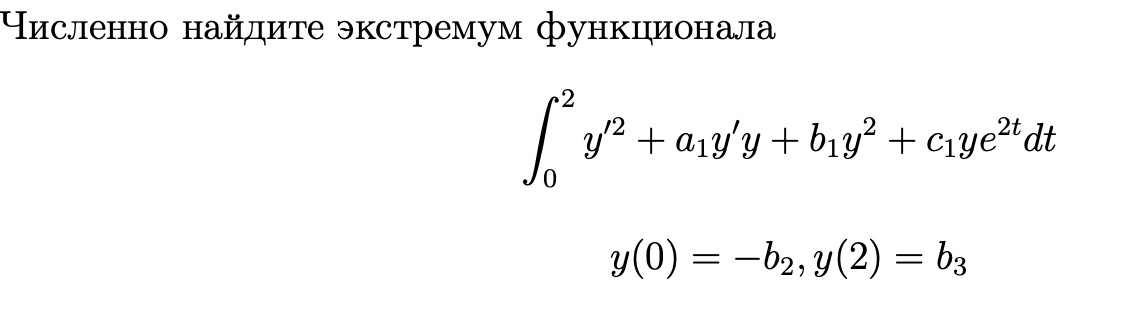

В данной задаче методом пристального взгляда было определено, что надо искать минимум (ну тут парабола ветвями вверх). Но мы проверим все варианты!

In [178]:
# Задаём дискретное время
num_of_fractions = 151   # Количество делений на дискретной шкале времени
t = np.linspace(0, 2, num_of_fractions)     # Дискретная шкала времени
dt = t[1] - t[0] #шаг

In [179]:
# Задаём оптимизируемый функционал в дискретном времени
def f(y):
    return np.sum(((y[1:] - y[:-1]) / dt) ** 2 + a1 * ((y[1:] - y[:-1]) / dt) * y[1:] +
                  b1 * y[1:] ** 2 + c1 * y[1:] * np.exp(2 * t[1:]), axis = 0)

In [180]:
def f_analytical(y):
    return[0.018310 * np.exp(elem * np.sqrt(15))
           - 0.609221201 * np.exp(- elem * np.sqrt(15)) - (9/22) * np.exp(2 * elem) for elem in t]

In [181]:
y0 = [0.2 for x in range(0, num_of_fractions)]     # Начальное значение y

bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0], bounds[-1] = (-b2 - 10e-6, -b2 + 10e-6), (b3 - 10e-6, b3 + 10e-6)

In [182]:
# Минимизируем функционал
res = minimize(f, y0, method='l-bfgs-b', bounds=bounds)

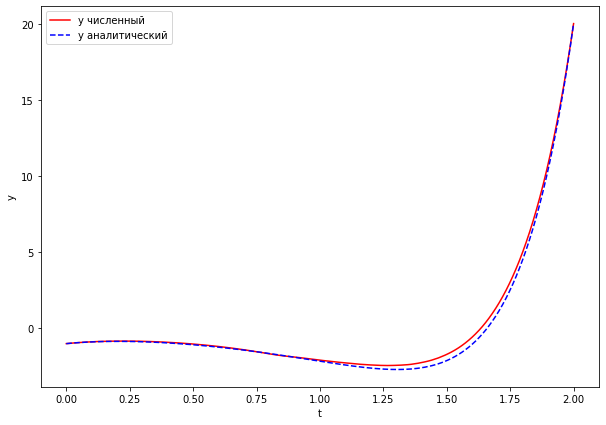

In [183]:
plt.figure(figsize=(10,7))
plt.plot(t, res.x, 'r', t, f_analytical(t), '--b')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(('y численный', 'y аналитический'))
plt.show()

In [189]:
res

      fun: 405146.4136180102
 hess_inv: <151x151 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 6.44288957e+02,  8.73114914e-02, -5.52972779e-01,  1.18161552e+00,
       -2.96859071e-01,  1.12922862e+00,  1.03609636e+00, -3.02679837e-01,
        7.15954229e-01,  1.92085281e-01,  0.00000000e+00,  1.40280463e+00,
        4.13274392e-01,  1.56578608e+00,  9.02218744e-01,  9.72067937e-01,
        9.13860276e-01,  1.45519152e+00,  8.96397978e-01,  1.88592821e+00,
        2.17114575e+00,  1.22236088e+00,  2.33412720e+00,  1.64727680e+00,
        1.50757842e+00,  1.94995664e+00,  3.26544978e+00,  1.69384293e+00,
        4.33647074e+00,  2.13622116e+00,  3.25962901e+00,  2.31666490e+00,
        3.82424332e+00,  2.84635462e+00,  5.29107638e+00,  3.49828042e+00,
        4.02214937e+00,  3.12575139e+00,  3.53902578e+00,  2.50875019e+00,
        6.65895641e+00,  3.95230018e+00,  6.38538040e+00,  5.50644472e+00,
        3.63215804e+00,  4.58676368e+00,  5.57047315e+00,  5.58211468e+00,


In [9]:
res.x

array([-1.00001   , -0.95387054, -0.91969251, -0.89691697, -0.88384113,
       -0.88009848, -0.88481447, -0.8970979 , -0.91676696, -0.94289084,
       -0.97561005, -1.01390018, -1.05823918, -1.10746976, -1.16195264,
       -1.22094059, -1.28412755, -1.35145791, -1.42196855, -1.49570042,
       -1.5716322 , -1.64911712, -1.7274889 , -1.80518052, -1.88162978,
       -1.954421  , -2.02268597, -2.08311547, -2.13401769, -2.17143037,
       -2.19188298, -2.19090347, -2.16292491, -2.10177962, -2.00005785,
       -1.8487429 , -1.63795522, -1.35515948, -0.98684125, -0.51591791,
        0.07614751,  0.81256641,  1.71867155,  2.82556414,  4.16808563,
        5.78753466,  7.73145849, 10.05537874, 12.82309461, 16.10938426,
       19.99999   ])

In [10]:
min(res.x)

-2.191882983630258

In [23]:
max(res.x)

19.99999

Лаааадно, надо честно найти, может там есть максимум. Для этого поменяем знаки всего в функционале

In [29]:
# Задаём дискретное время
num_of_fractions = 51   # Количество делений на дискретной шкале времени
t = np.linspace(0, 2, num_of_fractions)     # Дискретная шкала времени
dt = t[1] - t[0] #шаг

In [30]:
# Задаём оптимизируемый функционал в дискретном времени
def f(y):
    return np.sum(-((y[1:] - y[:-1]) / dt) ** 2 - a1 * ((y[1:] - y[:-1]) / dt) * y[1:] -
                  b1 * y[1:] ** 2 - c1 * y[1:] * np.exp(2 * t[1:]), axis = 0)

In [13]:
y0 = [0.2 for x in range(0, num_of_fractions)]     # Начальное значение y

bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0], bounds[-1] = (-b2 - 10e-6, -b2 + 10e-6), (b3 - 10e-6, b3 + 10e-6)

In [14]:
# Минимизируем функционал
res = minimize(f, y0, method='l-bfgs-b', bounds=bounds)

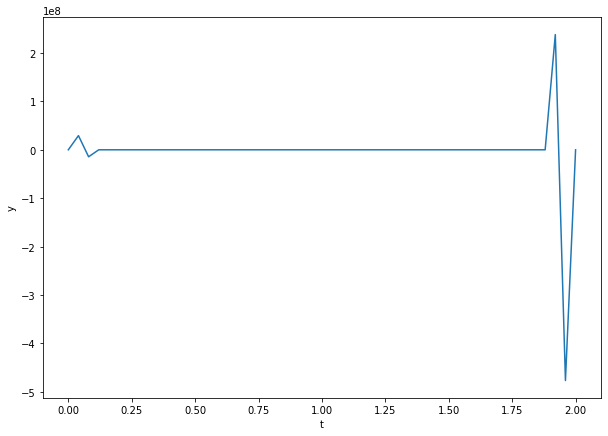

In [15]:
plt.figure(figsize=(10,7))
plt.plot(t, res.x)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

Упс, видимо есть только минимум

# Задача 2

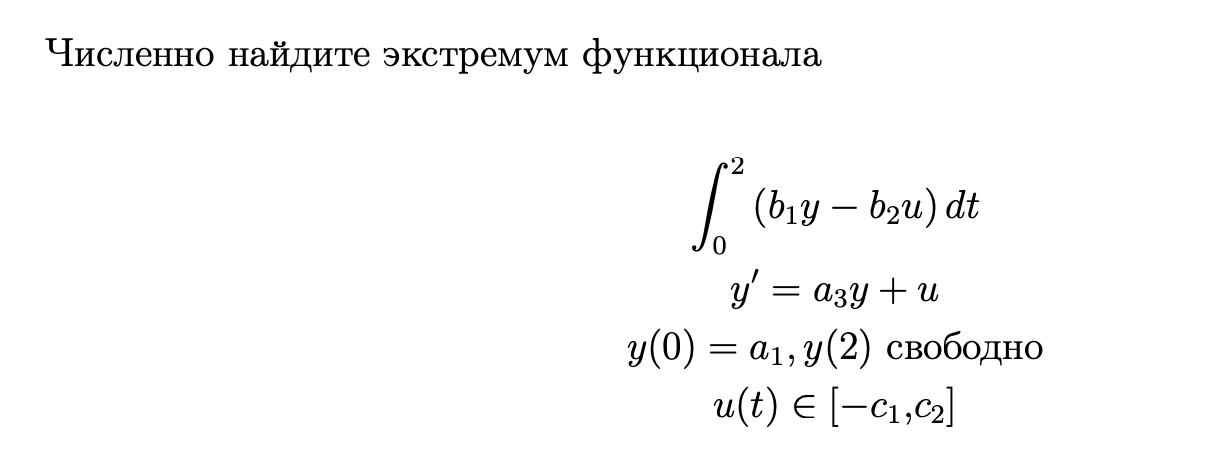

Эта задача принесла мне много боли, но я сделала все, что могла.

Ниже представлено то, что выдает мне Юпитер. Я много гуглила и походу это какой-то баг/сбой/непонятно что конкретно у маков. Поэтому я еще раз все чекнула в вс коде и колабе, вот на колаб ссылочку прикрепляю. Замечу, что в колабе семинарский код отлично работает, поэтому у меня нет причин не верить тому, что там модули гекко нормально работают. Выводы по данной задаче сделаны на основе вывода в коллабе.

Ссылка на колаб: https://colab.research.google.com/drive/1NVL0S0dwfVHMQHfLCRnFJf7UzYZamJPi#scrollTo=dS1DmuvlPEVb 


In [140]:
# Инициализируем модель
m = GEKKO(remote=True)
nt = 101
m.time = np.linspace(0,2,nt)
a1 = 12
a2 = 16
a3 = 18
b1 = 15
b2 = 1
b3 = 20
c1 = 9
c2 = 21
c3 = 18
# Задаём переменные
y = m.Var(value = a1) # y(0)= a1 по условию в начальной точке
z = m.Var(value=5) 
u = m.Var(value=0, lb = -c1, ub = c2) # ограничения на u
t = m.Var(value=0)
p = np.zeros(nt)    # Отмечаем последнюю точку
p[-1] = 1.0
final = m.Param(value=p)
# Задаём уравнения

m.Equation(y.dt()== a3 * y + u)
m.Equation(z.dt()== b1 * y - b2 * u )
m.Equation(t.dt() == 1)
m.Obj(z * final)    # Целевая функция
m.options.IMODE = 6 # 6 -- задача оптимального управления/динамического программирования
m.solve(disp=True)

# Рисуем получившееся решение
plt.figure(figsize=(12,12))
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.locator_params(axis='y', nbins=20)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

apm 109.252.36.89_gk_model12 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:            700
 Number of total equations: -          600
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            100
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipo

  74r 3.4446385e+12 1.15e+01 3.86e-03  -8.0 1.71e-01    -  1.00e+00 3.05e-05h 16
  75r 3.4446385e+12 1.15e+01 4.13e-03  -8.4 1.74e-01    -  1.00e+00 1.53e-05h 17
  76r 3.4446385e+12 1.15e+01 4.58e-03  -8.4 4.45e-01    -  1.00e+00 3.81e-06h 19
  77r 3.4446385e+12 1.15e+01 4.58e-03  -8.4 4.38e-01    -  1.00e+00 9.54e-07h 21
  78r 3.4446385e+12 1.15e+01 4.58e-03  -8.4 4.36e-01    -  1.00e+00 4.77e-07h 22
  79r 3.4446385e+12 1.15e+01 4.58e-03  -6.6 9.22e-01    -  1.00e+00 4.88e-04h 12
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80r 3.4446385e+12 1.15e+01 1.64e-04  -6.8 1.60e-01    -  1.00e+00 6.10e-05h 15
  81r 3.4446385e+12 1.15e+01 1.20e-03  -9.0 1.61e-01    -  1.00e+00 7.63e-06h 18
  82r 3.4446385e+12 1.15e+01 4.88e-03  -9.0 1.08e+00    -  1.00e+00 3.81e-06h 19
  83r 3.4446385e+12 1.15e+01 4.88e-03  -8.4 1.04e+00    -  1.00e+00 1.91e-06h 20
  84r 3.4446385e+12 1.15e+01 4.58e-03  -8.0 4.45e-01    -  1.00e+00 2.38e-07h 23
  85r 3.4446385e+12 1.15e+01

 212r 3.4446385e+12 1.15e+01 3.80e-10  -4.4 5.42e-04    -  1.00e+00 7.62e-06f 18
 213r 3.4446385e+12 1.15e+01 3.80e-10  -4.4 5.42e-04    -  1.00e+00 7.62e-06f 18
 214r 3.4446385e+12 1.15e+01 3.80e-10  -4.4 5.42e-04    -  1.00e+00 7.62e-06f 18
 215r 3.4446385e+12 1.15e+01 3.80e-10  -4.4 5.42e-04    -  1.00e+00 7.62e-06f 18
 216r 3.4446385e+12 1.15e+01 3.80e-10  -4.4 5.42e-04    -  1.00e+00 7.62e-06f 18
 217r 3.4446385e+12 1.15e+01 3.80e-10  -4.4 5.42e-04    -  1.00e+00 7.62e-06f 18
 218r 3.4446385e+12 1.15e+01 3.80e-10  -4.4 5.42e-04    -  1.00e+00 7.62e-06f 18
 219r 3.4446385e+12 1.15e+01 3.80e-10  -4.4 5.42e-04    -  1.00e+00 7.62e-06f 18
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 220r 3.4446385e+12 1.15e+01 3.80e-10  -4.4 5.42e-04    -  1.00e+00 9.99e-01w  1
 221r 3.4446385e+12 1.15e+01 3.80e-10  -4.4 3.01e-04    -  1.00e+00 1.00e+00w  1
 222r 3.4446385e+12 1.15e+01 3.80e-10  -4.4 2.06e-04    -  1.00e+00 1.00e+00w  1
 223r 3.4446385e+12 1.15e+01

Exception:  @error: Solution Not Found


In [137]:
m = GEKKO(remote=True)
nt = 101
m.time = np.linspace(0,2,nt)

y = m.Var(value = 12)
z = m.Var(value = 5)
u = m.Var(value = 5,lb = -9,ub = 21)
t = m.Var(value = 0)
p = np.zeros(nt)    
p[-1] = 1.0
final = m.Param(value = p)


m.Equation(y.dt() == 18 * y + u)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == 15 * y - u)
m.Obj(z * final)    
m.options.IMODE = 6 
m.solve(disp=False)


# Рисуем получившееся решение
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Exception:  @error: Solution Not Found


Вывод: у данной задачи нет экстремумов

I did my best

8.12.2020 поступила информация, что если у задачи нет решения, чтоо константу перед у можно заменить на какую-то близкую к нулю. Взяла я 0.2, и вот что получилось

По большому счету вырадение под интегралом - линейная функция. Вот она и получилась такой вот 

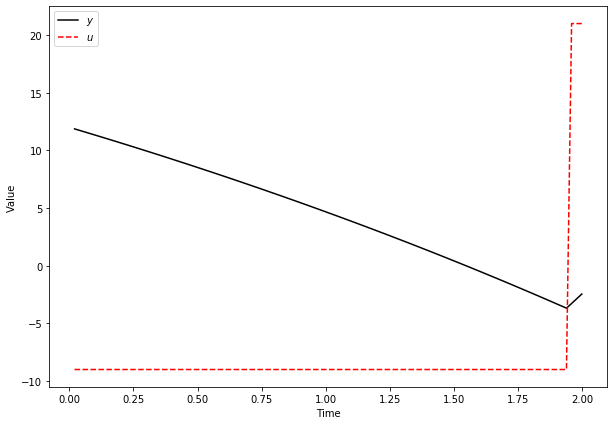

In [186]:
m = GEKKO(remote=True)
nt = 101
m.time = np.linspace(0,2,nt)

y = m.Var(value = 12)
z = m.Var(value = 5)
u = m.Var(value = 5,lb = -9,ub = 21)
t = m.Var(value = 0)
p = np.zeros(nt)    
p[-1] = 1.0
final = m.Param(value = p)


m.Equation(y.dt() == 0.2 * y + u)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == 15 * y - u)
m.Obj(z * final)    
m.options.IMODE = 6 
m.solve(disp=False)


# Рисуем получившееся решение
plt.figure(figsize=(10,7))
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [187]:
y.value[1:]

[11.867469878,
 11.734407506,
 11.600810747,
 11.466677455,
 11.332005475,
 11.196792644,
 11.061036789,
 10.924735731,
 10.787887278,
 10.650489233,
 10.512539389,
 10.374035529,
 10.234975429,
 10.095356855,
 9.955177563,
 9.8144353024,
 9.6731278119,
 9.5312528213,
 9.3888080518,
 9.2457912148,
 9.1022000131,
 8.9580321398,
 8.8132852791,
 8.6679571058,
 8.5220452851,
 8.3755474732,
 8.2284613167,
 8.0807844527,
 7.9325145089,
 7.7836491035,
 7.6341858451,
 7.4841223326,
 7.3334561555,
 7.1821848932,
 7.0303061159,
 6.8778173836,
 6.7247162468,
 6.571000246,
 6.4166669119,
 6.2617137651,
 6.1061383166,
 5.9499380671,
 5.7931105073,
 5.635653118,
 5.4775633696,
 5.3188387227,
 5.1594766274,
 4.9994745237,
 4.8388298413,
 4.6775399995,
 4.5156024073,
 4.3530144634,
 4.1897735558,
 4.0258770623,
 3.8613223499,
 3.6961067752,
 3.5302276841,
 3.3636824119,
 3.1964682833,
 3.0285826119,
 2.8600227009,
 2.6907858425,
 2.520869318,
 2.3502703978,
 2.1789863413,
 2.0070143971,
 1.8343518025,

Проверим на m.Maximize:

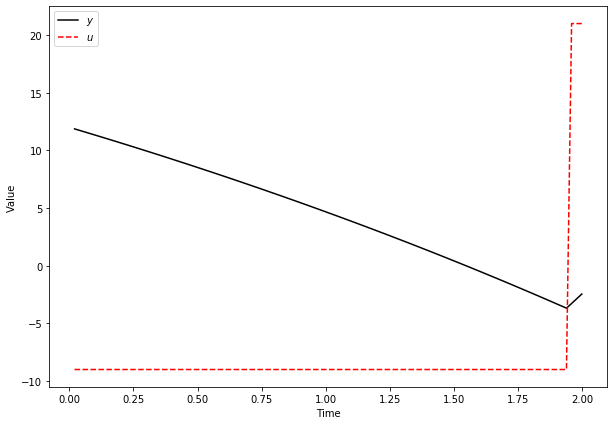

In [185]:
m = GEKKO(remote=True)
nt = 101
m.time = np.linspace(0,2,nt)

y = m.Var(value = 12)
z = m.Var(value = 5)
u = m.Var(value = 5,lb = -9,ub = 21)
t = m.Var(value = 0)
p = np.zeros(nt)    
p[-1] = 1.0
final = m.Param(value = p)


m.Equation(y.dt() == 0.2 * y + u)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == -15 * y + u)
m.Maximize(z * final)    
m.options.IMODE = 6 
m.solve(disp=False)


# Рисуем получившееся решение
plt.figure(figsize=(10,7))
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Задача 6

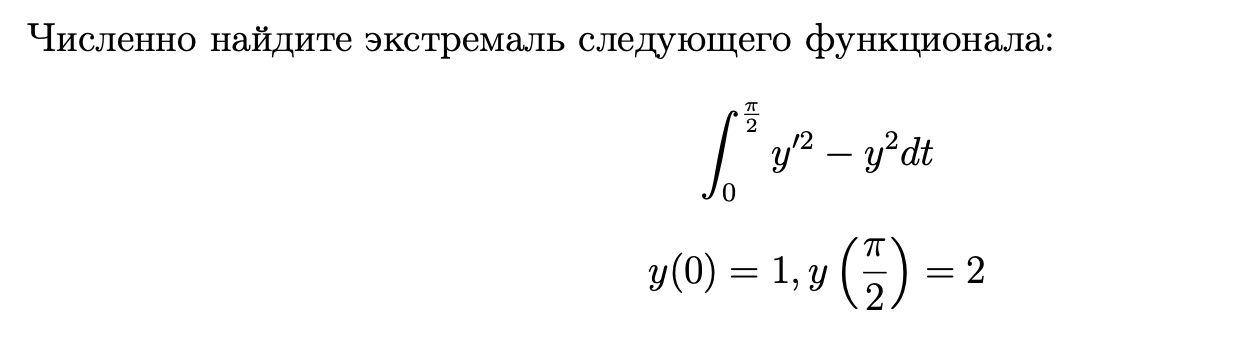

In [159]:
num_of_fractions = 51
t = np.linspace(0, (math.pi)/2, num_of_fractions)
dt = t[1] - t[0]

In [160]:
def f(y):
    return np.sum(((y[1:] - y[:-1]) / dt) ** 2 - y[1:] ** 2 )

In [161]:
y0 = [0.2 for x in range(0, num_of_fractions)]     # Начальное значение y

bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0], bounds[-1] = (1.0 - 10e-6, 1.0 + 10e-6), (2.0 - 10e-6, 2.0 + 10e-6)

In [162]:
def f_analytical(y):
    return [2 * np.sin(elem) + np.cos(elem) for elem in t]

In [163]:
res = minimize(f, y0, method='l-bfgs-b', bounds=bounds)

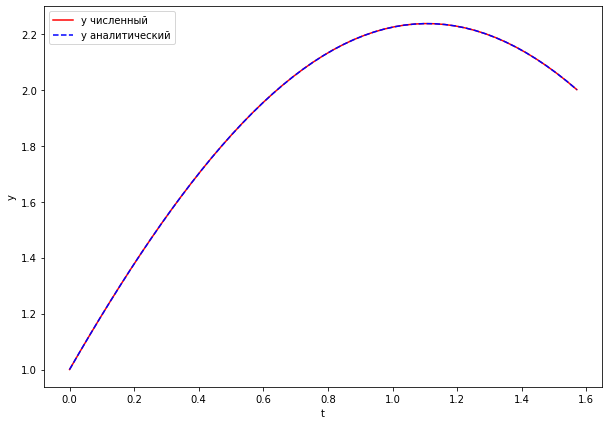

In [164]:
plt.figure(figsize=(10,7))
plt.plot(t, res.x, 'r', t, f_analytical(t), '--b')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(('y численный', 'y аналитический'))
plt.show()

In [165]:
res

      fun: -128.82044567375044
 hess_inv: <51x51 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.26315283e+02, -4.40820713e-03, -9.12336873e-04, -4.80895324e-03,
       -3.97903932e-05,  2.52953214e-04,  2.44995135e-03, -2.50679477e-03,
        4.41957582e-03, -4.79758455e-03,  8.26503310e-03, -1.35287337e-03,
        1.16159526e-02, -2.24247287e-03,  5.56212854e-03, -4.11262135e-03,
       -2.44995135e-03,  1.59445790e-03, -1.50066626e-03,  4.80326889e-03,
        7.95807864e-04, -1.36708422e-03, -7.78754838e-04, -3.68629571e-03,
       -2.24531505e-03,  2.00373051e-03, -3.43618467e-03,  5.06474862e-03,
       -4.09272616e-03,  5.15854026e-03, -3.29976046e-03,  3.11501935e-03,
       -2.27657893e-03, -3.39923645e-03, -1.04591891e-03, -4.20357082e-03,
       -9.66338121e-04,  2.28510544e-03, -3.02975423e-03,  2.60058641e-03,
       -2.92175173e-03,  9.66338121e-05,  1.29318778e-03,  3.61524144e-03,
        4.28315161e-03,  5.85487214e-03,  1.17950094e-03,  3.58966190e-03,


In [23]:
res.x

array([1.00001   , 1.0623441 , 1.12363189, 1.18381116, 1.24282444,
       1.30061113, 1.35711405, 1.41227636, 1.46604605, 1.51836663,
       1.56919103, 1.61846263, 1.66613755, 1.71216233, 1.7564984 ,
       1.79909813, 1.83992426, 1.87893568, 1.91609189, 1.95135774,
       1.98469531, 2.01607369, 2.04546296, 2.07283384, 2.09816074,
       2.12141796, 2.14258045, 2.16162999, 2.17854361, 2.19330912,
       2.20590738, 2.21633013, 2.22456393, 2.2306033 , 2.23444285,
       2.23607761, 2.23550754, 2.2327316 , 2.22775092, 2.22057304,
       2.21120227, 2.19965058, 2.18592789, 2.17004715, 2.15202288,
       2.13187254, 2.10961525, 2.08527528, 2.05887546, 2.03044498,
       2.00001   ])

In [122]:
max(res.x)

2.2360776117022234

# Задача 7
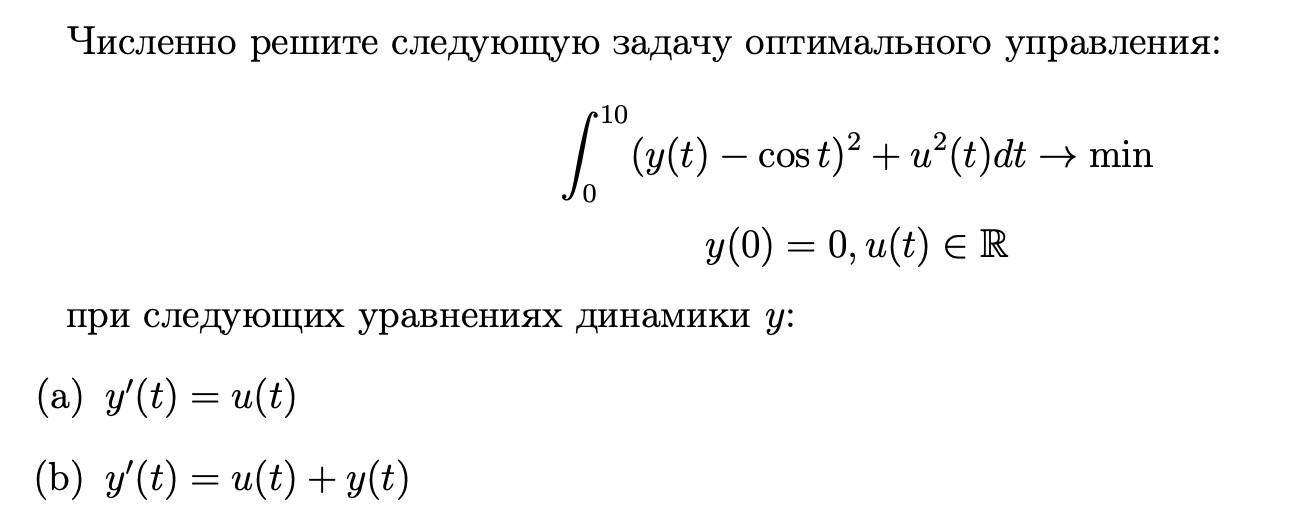

#### Пункт А

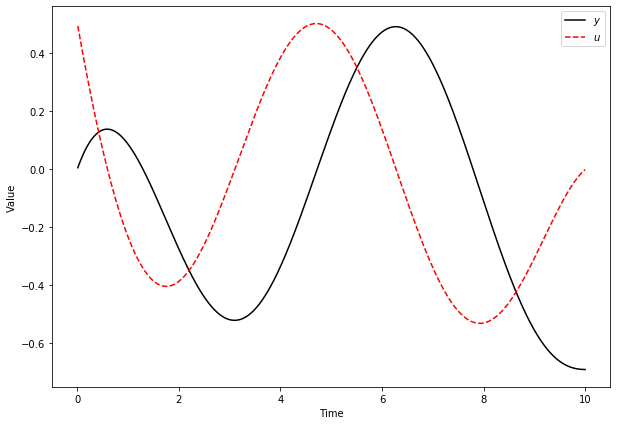

In [188]:
# Инициализируем модель
m = GEKKO(remote=True)
nt = 1001
m.time = np.linspace(0,10,nt)

# Задаём переменные
y = m.Var(value=0)
z = m.Var(value=1)
u = m.Var(value=0)
t = m.Var(value=0)
p = np.zeros(nt)    # Отмечаем последнюю точку
p[-1] = 1.0
final = m.Param(value=p)


# Задаём уравнения
m.Equation(y.dt() == u)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == (y - m.cos(t))**2 + u**2)
m.Obj(z * final)    # Целевая функция
m.options.IMODE = 6 # 6 -- задача оптимального управления/динамического программирования
m.solve(disp=False)


# Рисуем получившееся решение
plt.figure(figsize=(10,7))
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [125]:
y.value[1:]

[0.0049498356539,
 0.0098001712914,
 0.014551506945,
 0.019204342747,
 0.023759178971,
 0.028216516088,
 0.032576854802,
 0.036840696102,
 0.041008541301,
 0.04508089208,
 0.049058250533,
 0.0529411192,
 0.056730001116,
 0.060425399843,
 0.06402781951,
 0.067537764851,
 0.07095574124,
 0.074282254727,
 0.07751781207,
 0.08066292077,
 0.083718089105,
 0.086683826157,
 0.089560641847,
 0.092349046962,
 0.095049553184,
 0.097662673119,
 0.10018892032,
 0.10262880933,
 0.10498285567,
 0.10725157592,
 0.10943548767,
 0.11153510961,
 0.11355096152,
 0.11548356429,
 0.11733343996,
 0.11910111169,
 0.12078710386,
 0.122391942,
 0.12391615287,
 0.12536026445,
 0.12672480596,
 0.12801030787,
 0.12921730191,
 0.13034632111,
 0.13139789977,
 0.13237257351,
 0.13327087926,
 0.13409335527,
 0.13484054113,
 0.13551297775,
 0.13611120741,
 0.13663577375,
 0.13708722174,
 0.13746609775,
 0.1377729495,
 0.13800832609,
 0.138172778,
 0.1382668571,
 0.13829111661,
 0.13824611117,
 0.13813239678,
 0.137950

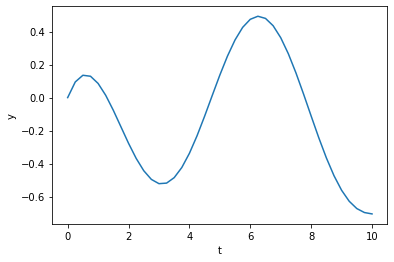

[ 1.00000000e-05  9.50536464e-02  1.35481295e-01  1.29526376e-01
  8.59358614e-02  1.39420216e-02 -7.68876026e-02 -1.76947986e-01
 -2.76925575e-01 -3.68199527e-01 -4.43222505e-01 -4.95865094e-01
 -5.21729929e-01 -5.18318407e-01 -4.85174743e-01 -4.23820143e-01
 -3.37674680e-01 -2.31777283e-01 -1.12484627e-01  1.29446148e-02
  1.36838240e-01  2.51540044e-01  3.49968442e-01  4.25979470e-01
  4.74790699e-01  4.93283044e-01  4.80123025e-01  4.35946049e-01
  3.63193841e-01  2.66022056e-01  1.49992320e-01  2.16630710e-02
 -1.11788173e-01 -2.43146582e-01 -3.65588528e-01 -4.73265251e-01
 -5.61713781e-01 -6.28327868e-01 -6.72659893e-01 -6.96711259e-01
 -7.05083179e-01]
0.4932830439444109
-0.7050831789085328


In [25]:
# Задаём дискретное время
num_of_fractions = 41   # Количество делений на дискретной шкале времени
t = np.linspace(0, 10, num_of_fractions)     # Дискретная шкала времени
dt = t[1] - t[0]    # Рассчитываем шаг шкалы

y0 = [0.2 for x in range(0, num_of_fractions)]     # Начальное значение y

# Задаем ограничения на y. У нас y(0)=0 и y(2)=1
bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0] = (-10e-6, 10e-6)

def f(y):
    u = ((y[1:] - y[:-1]) / dt)
    return np.sum((y[1:] - np.cos(t[1:])) ** 2 + u ** 2)

res = minimize(f, y0, method='l-bfgs-b', bounds=bounds)


plt.plot(t, res.x)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

print(res.x)

print(max(res.x))

print(min(res.x))

#### Пункт Б

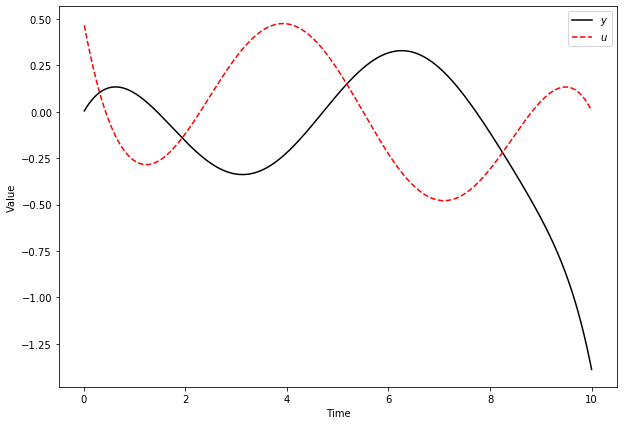

In [126]:
# Инициализируем модель
m = GEKKO(remote=True)
nt = 1001
m.time = np.linspace(0,10,nt)

# Задаём переменные
y = m.Var(value=0)
z = m.Var(value=1)
u = m.Var(value=0)
t = m.Var(value=0)
p = np.zeros(nt)    # Отмечаем последнюю точку
p[-1] = 1.0
final = m.Param(value=p)


# Задаём уравнения
m.Equation(y.dt() == u + y)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == (y - m.cos(t))**2 + u**2)
m.Obj(z * final)    # Целевая функция
m.options.IMODE = 6 # 6 -- задача оптимального управления/динамического программирования
m.solve(disp=False)


# Рисуем получившееся решение
plt.figure(figsize=(10,7))
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [127]:
y.value[1:]

[0.0047032461089,
 0.0093064373179,
 0.013810518716,
 0.018216425467,
 0.022525083001,
 0.026737407192,
 0.030854304542,
 0.034876672358,
 0.038805398925,
 0.04264136368,
 0.046385437381,
 0.050038482272,
 0.053601352246,
 0.057074893009,
 0.060459942236,
 0.063757329726,
 0.066967877557,
 0.070092400236,
 0.073131704844,
 0.076086591188,
 0.078957851935,
 0.081746272763,
 0.084452632489,
 0.087077703212,
 0.089622250444,
 0.092087033238,
 0.094472804325,
 0.096780310231,
 0.099010291408,
 0.10116348235,
 0.10324061173,
 0.10524240249,
 0.10716957197,
 0.10902283204,
 0.11080288918,
 0.11251044461,
 0.11414619438,
 0.11571082952,
 0.11720503607,
 0.11862949525,
 0.11998488352,
 0.1212718727,
 0.12249113003,
 0.12364331833,
 0.12472909602,
 0.12574911725,
 0.12670403199,
 0.12759448611,
 0.12842112144,
 0.1291845759,
 0.12988548355,
 0.13052447468,
 0.13110217589,
 0.13161921015,
 0.13207619692,
 0.13247375216,
 0.13281248845,
 0.13309301504,
 0.13331593793,
 0.13348185994,
 0.133591380

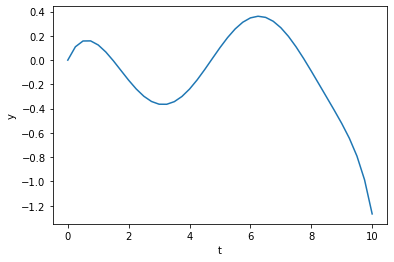

[ 1.00000000e-05  1.10066936e-01  1.57730275e-01  1.58550104e-01
  1.24822270e-01  6.68713069e-02 -6.21372713e-03 -8.62283503e-02
 -1.65755758e-01 -2.38225242e-01 -2.98050353e-01 -3.40789337e-01
 -3.63308787e-01 -3.63886599e-01 -3.42274217e-01 -2.99672214e-01
 -2.38638552e-01 -1.62906732e-01 -7.71494704e-02  1.33219313e-02
  1.02886224e-01  1.85966016e-01  2.57367413e-01  3.12602390e-01
  3.48171530e-01  3.61747937e-01  3.52329767e-01  3.20253200e-01
  2.67129790e-01  1.95704241e-01  1.09559939e-01  1.27857530e-02
 -9.05105263e-02 -1.96770297e-01 -3.03680176e-01 -4.11037888e-01
 -5.21831778e-01 -6.43668725e-01 -7.90718199e-01 -9.86456896e-01
 -1.26764398e+00]
0.36174793700012764
-1.2676439775298123


In [128]:
# Задаём дискретное время
num_of_fractions = 41   # Количество делений на дискретной шкале времени
t = np.linspace(0, 10, num_of_fractions)     # Дискретная шкала времени
dt = t[1] - t[0]    # Рассчитываем шаг шкалы

y0 = [0.2 for x in range(0, num_of_fractions)]     # Начальное значение y

# Задаем ограничения на y. У нас y(0)=0 и y(2)=1
bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0] = (-10e-6, 10e-6)

def f(y):
    u = ((y[1:] - y[:-1]) / dt) - y[1:]
    return np.sum((y[1:] - np.cos(t[1:])) ** 2 + u ** 2)

res = minimize(f, y0, method='l-bfgs-b', bounds=bounds)


plt.plot(t, res.x)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

print(res.x)

print(max(res.x))

print(min(res.x))

# Задача 8

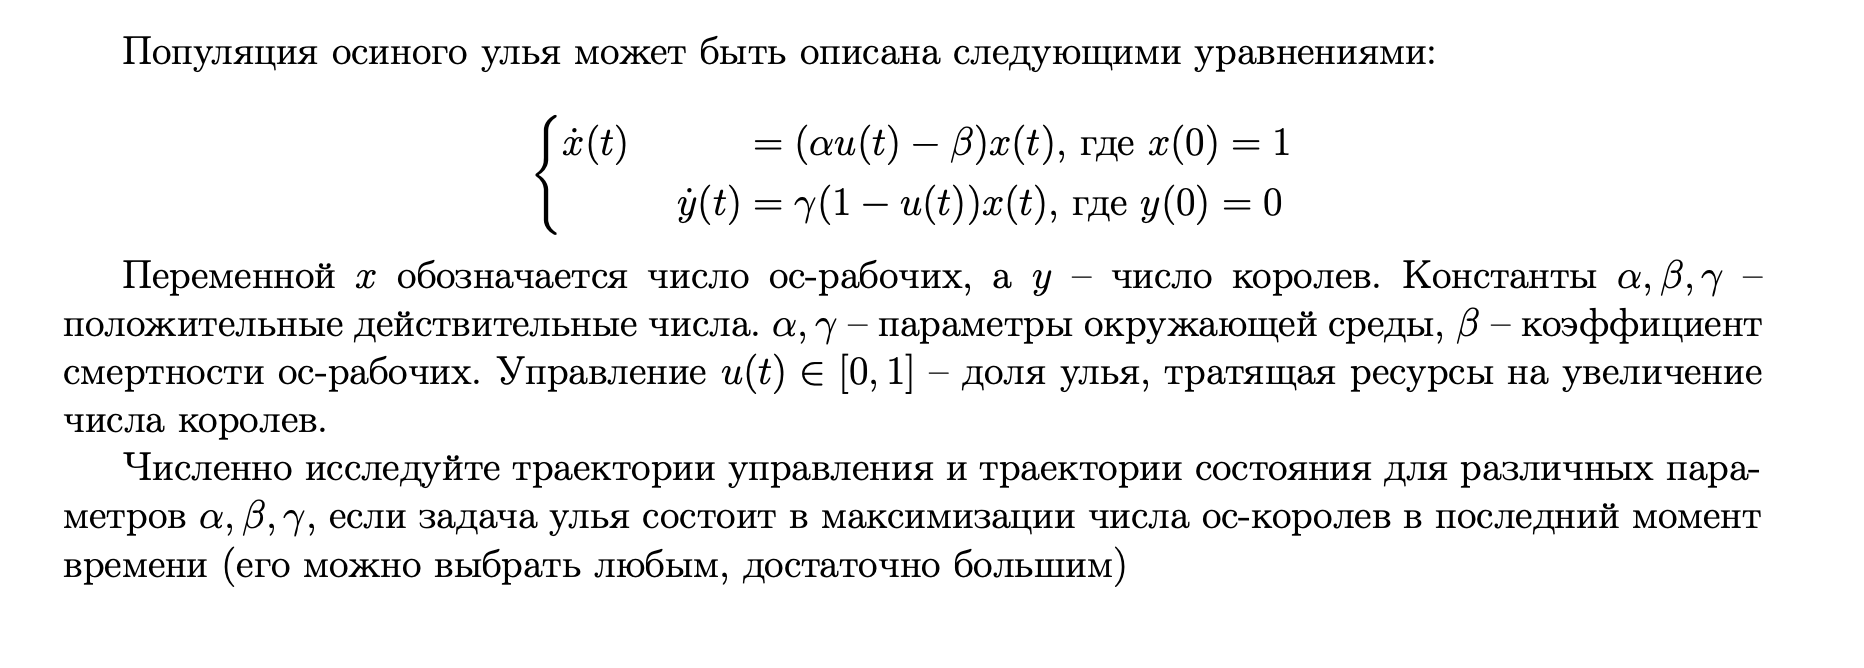

In [16]:
from itertools import product

In [131]:
Q = [[0.0001, 0.2, 0.5, 0.8, 0.99999],
     [0.0001, 0.2, 0.5, 0.8 ,0.99999],
     [0.0001, 0.2, 0.5, 0.8 ,0.99999]]
Z = sorted(product(*Q))
Z = np.array(Z)

In [132]:
Z

array([[1.0000e-04, 1.0000e-04, 1.0000e-04],
       [1.0000e-04, 1.0000e-04, 2.0000e-01],
       [1.0000e-04, 1.0000e-04, 5.0000e-01],
       [1.0000e-04, 1.0000e-04, 8.0000e-01],
       [1.0000e-04, 1.0000e-04, 9.9999e-01],
       [1.0000e-04, 2.0000e-01, 1.0000e-04],
       [1.0000e-04, 2.0000e-01, 2.0000e-01],
       [1.0000e-04, 2.0000e-01, 5.0000e-01],
       [1.0000e-04, 2.0000e-01, 8.0000e-01],
       [1.0000e-04, 2.0000e-01, 9.9999e-01],
       [1.0000e-04, 5.0000e-01, 1.0000e-04],
       [1.0000e-04, 5.0000e-01, 2.0000e-01],
       [1.0000e-04, 5.0000e-01, 5.0000e-01],
       [1.0000e-04, 5.0000e-01, 8.0000e-01],
       [1.0000e-04, 5.0000e-01, 9.9999e-01],
       [1.0000e-04, 8.0000e-01, 1.0000e-04],
       [1.0000e-04, 8.0000e-01, 2.0000e-01],
       [1.0000e-04, 8.0000e-01, 5.0000e-01],
       [1.0000e-04, 8.0000e-01, 8.0000e-01],
       [1.0000e-04, 8.0000e-01, 9.9999e-01],
       [1.0000e-04, 9.9999e-01, 1.0000e-04],
       [1.0000e-04, 9.9999e-01, 2.0000e-01],
       [1.

In [26]:
def traektorii1(a,b,g):
    m = GEKKO(remote = True)
    nt = 1001
    m.time = np.linspace(0,100,nt)


    x = m.Var(value = 1)
    y = m.Var(value = 0)
    t = m.Var(value = 0)
    u = m.Var(value = 0, lb = 0,ub = 1)


    p = np.zeros(nt)
    p[-1] = 1.0
    final = m.Param(value = p)

    m.Equation(x.dt() == x * (a * u - b))
    m.Equation(y.dt() == g * (1 - u) * x)
    m.Equation(t.dt() == 1)
    m.Maximize(y*final)
    m.options.IMODE = 6
    m.solve(disp=False)
    plt.figure(figsize=(12, 10))
    plt.subplot(2,1,1)
    plt.plot(m.time[1:],y.value[1:],'k-',label='y')
    plt.plot(m.time[1:],u.value[1:],'b-',label='u')
    plt.plot(m.time[1:],x.value[1:],'g-',label='x')
    plt.plot([], [], ' ', label = 'alpha = {}'.format(a))
    plt.plot([], [], ' ', label = 'betha = {}'.format(b))
    plt.plot([], [], ' ', label = 'gamma = {}'.format(g))
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

In [27]:
def poschitaem1():
    for x in range(len(Z)):
        try:
            a = Z[x][0]
            b = Z[x][1]
            g = Z[x][2]
            traektorii1(a,b,g)
        except:
            pass 

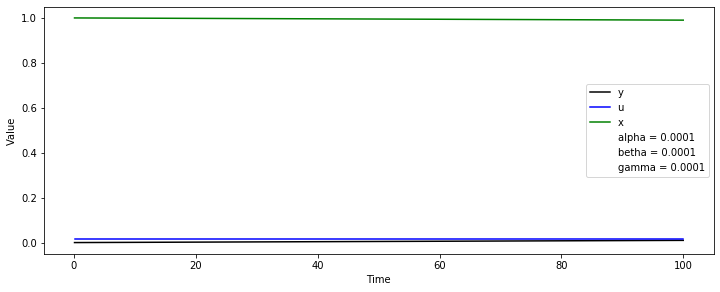

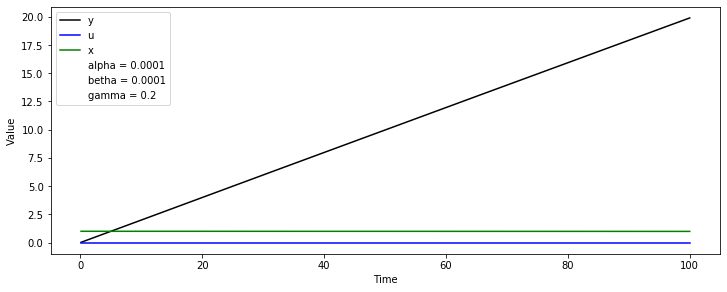

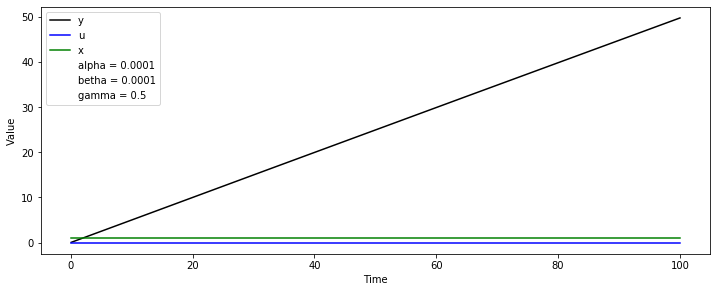

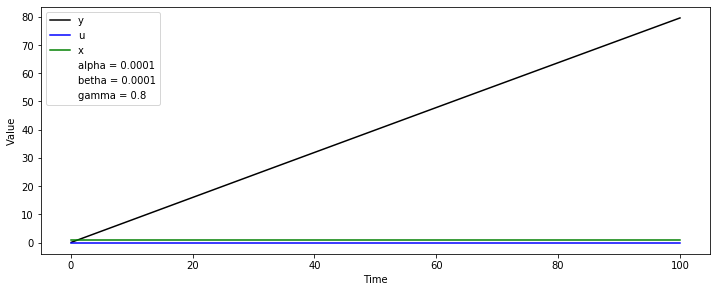

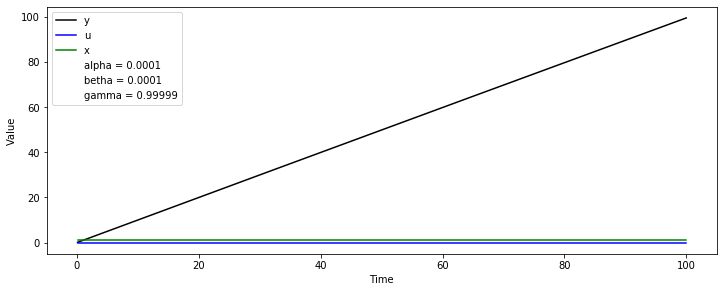

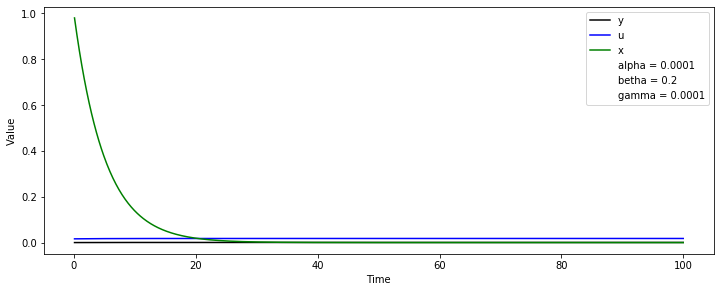

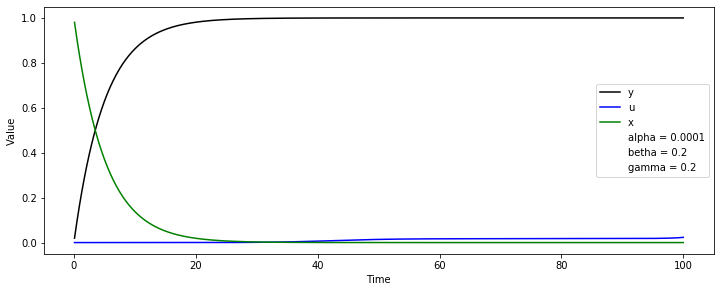

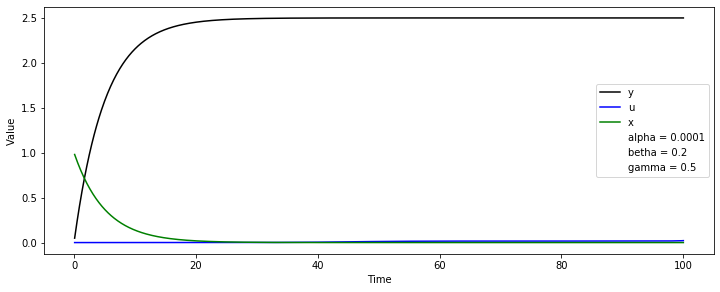

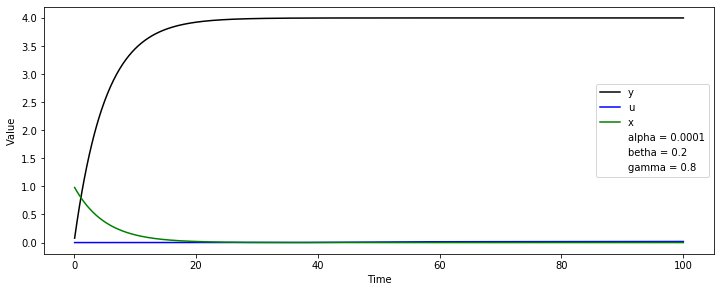

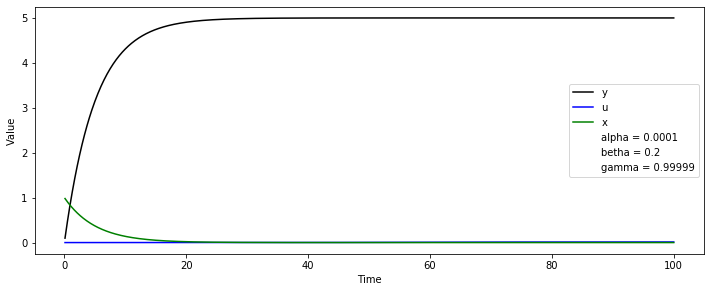

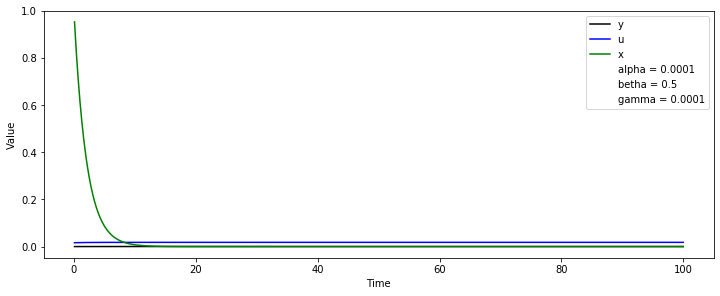

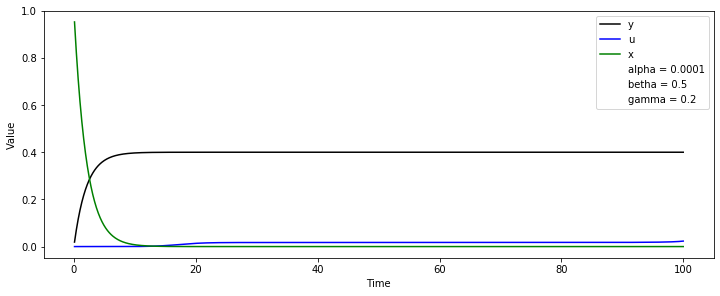

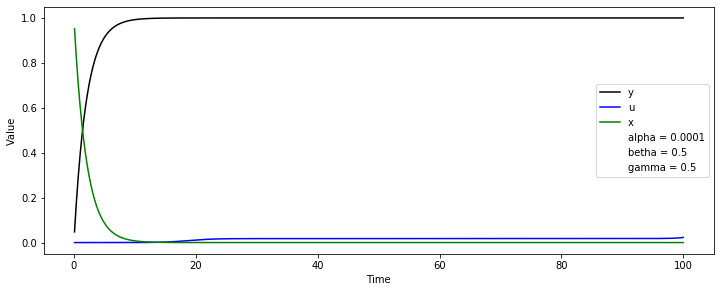

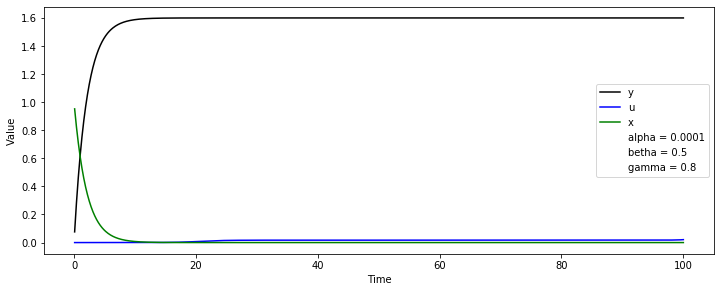

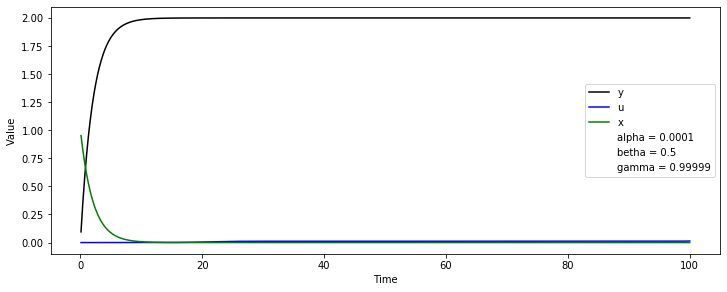

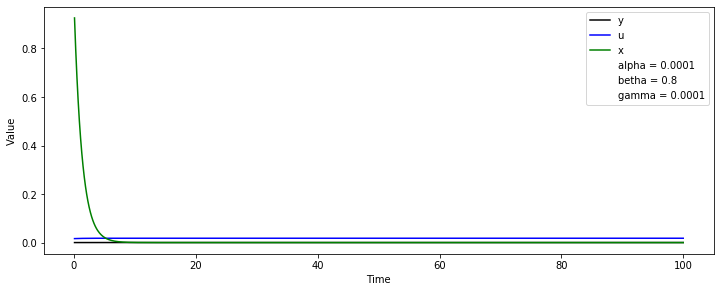

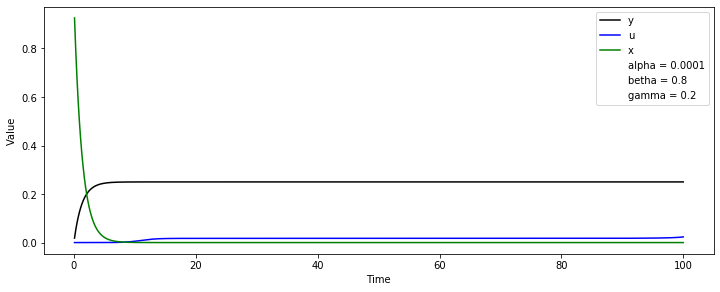

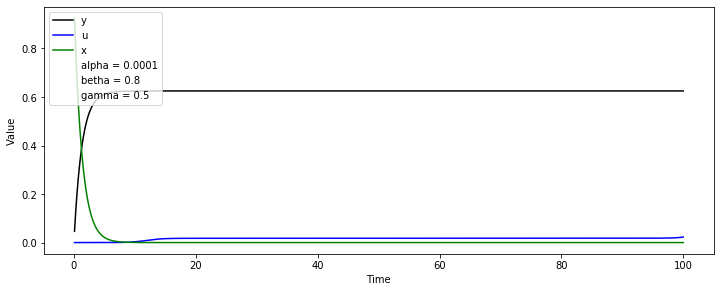

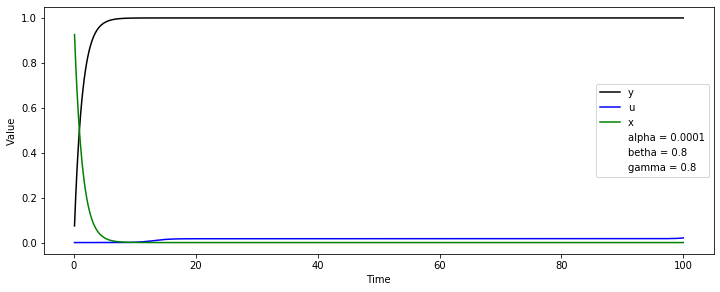

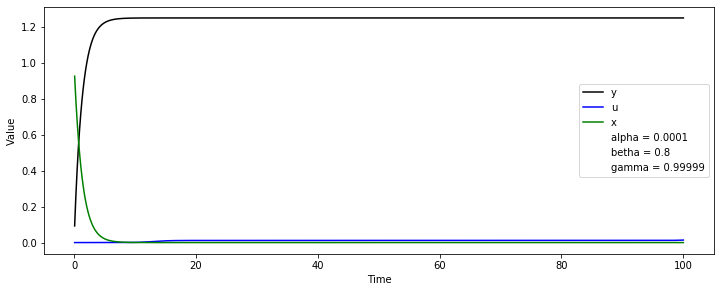

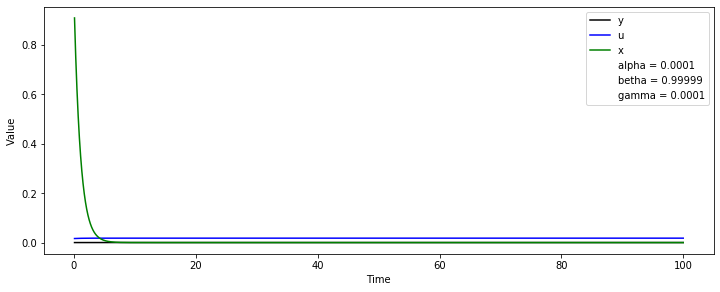

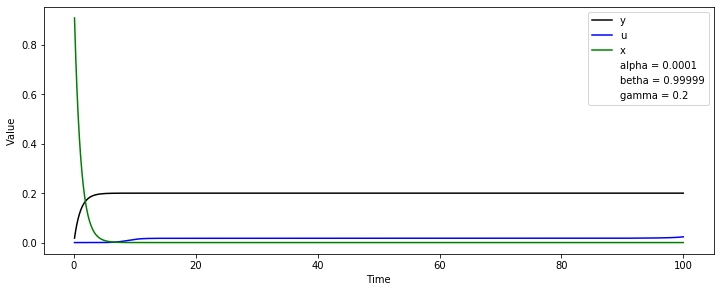

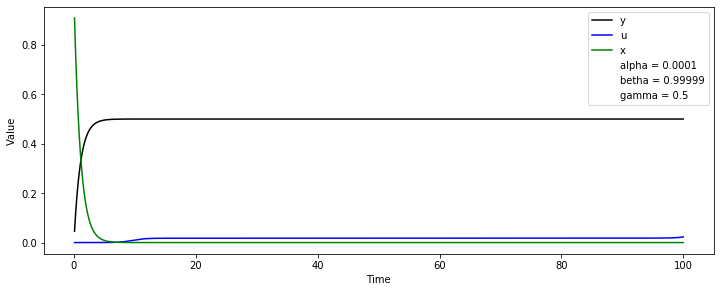

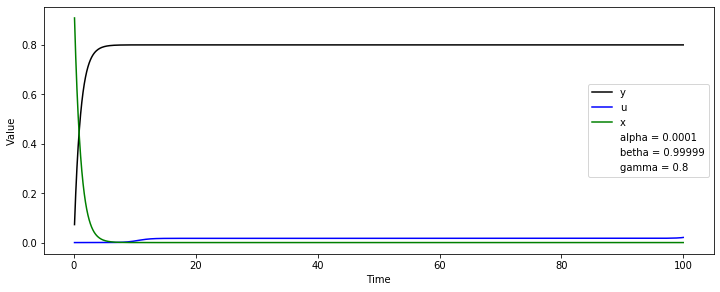

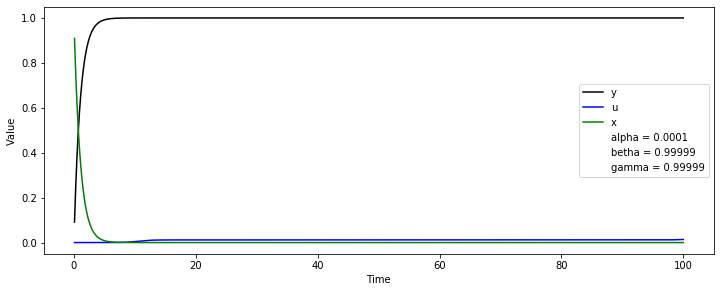

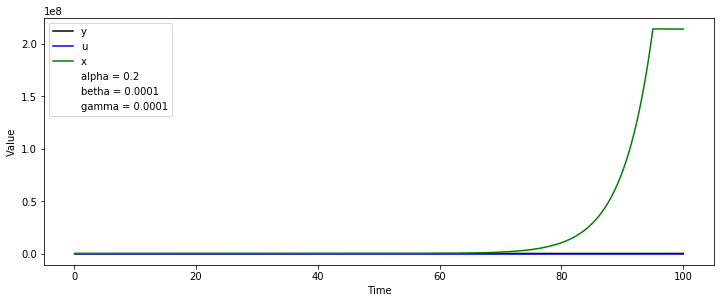

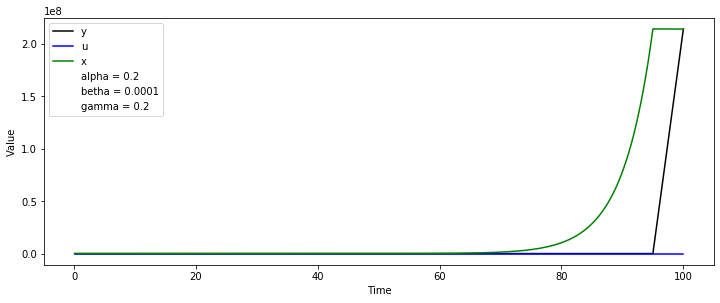

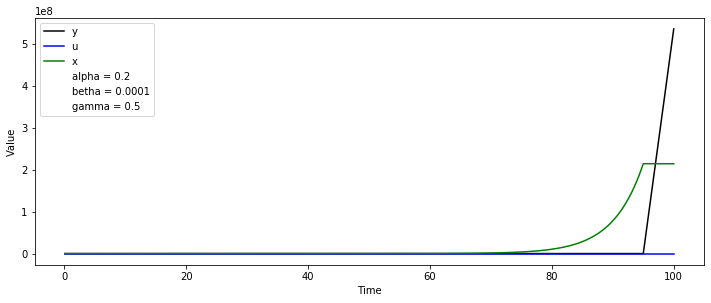

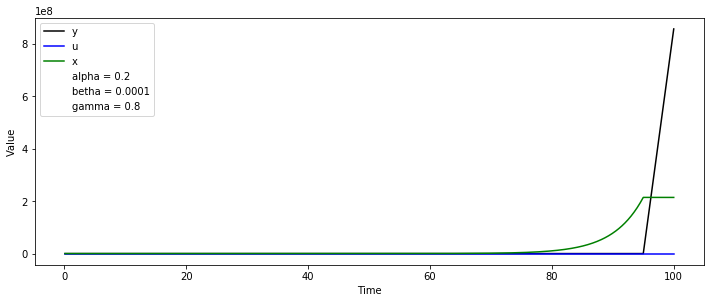

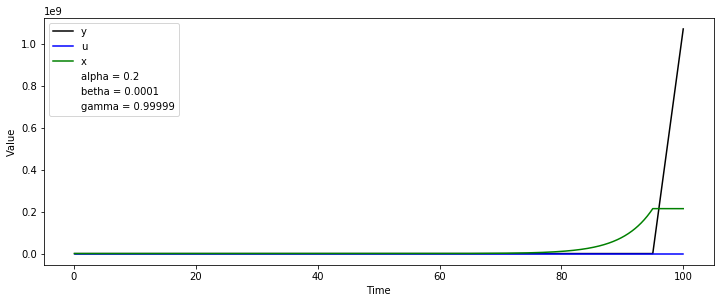

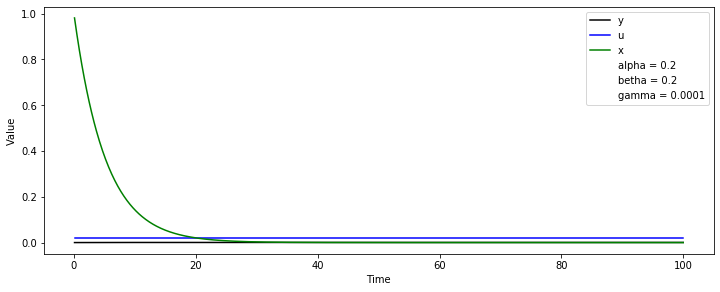

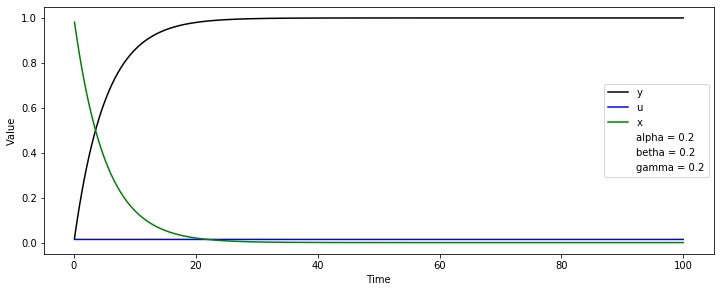

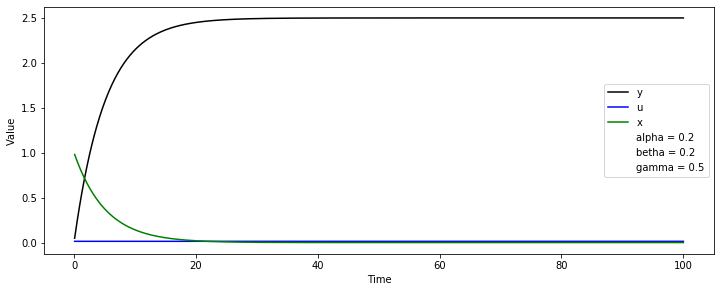

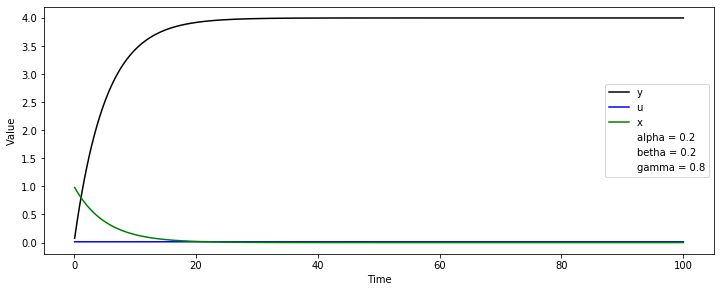

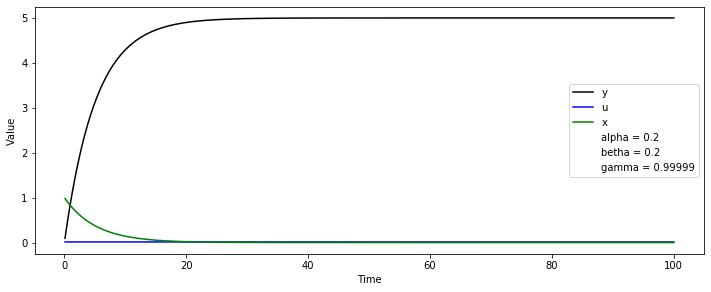

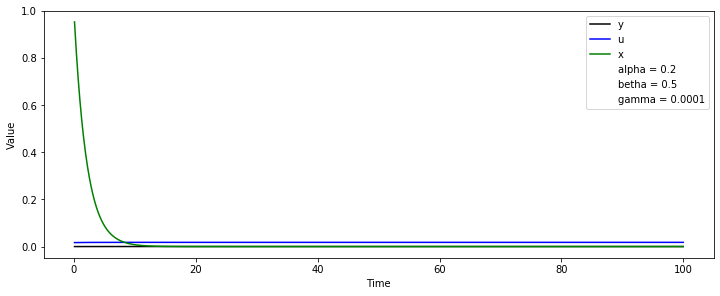

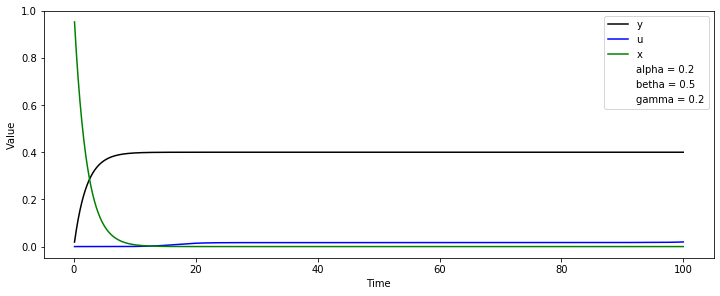

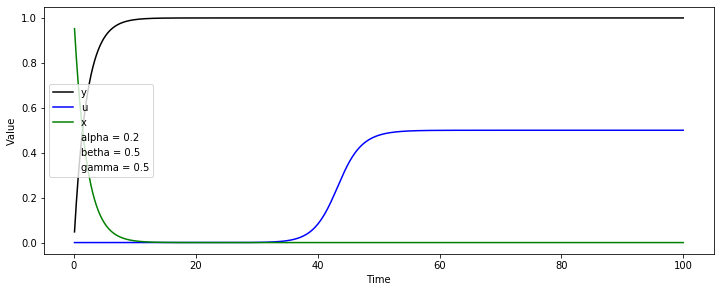

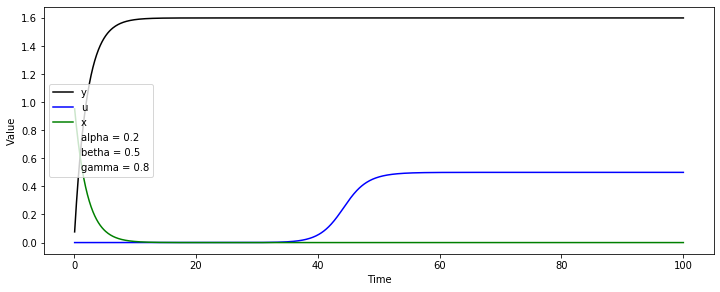

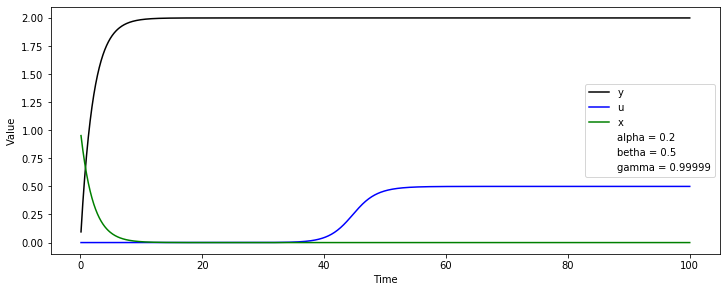

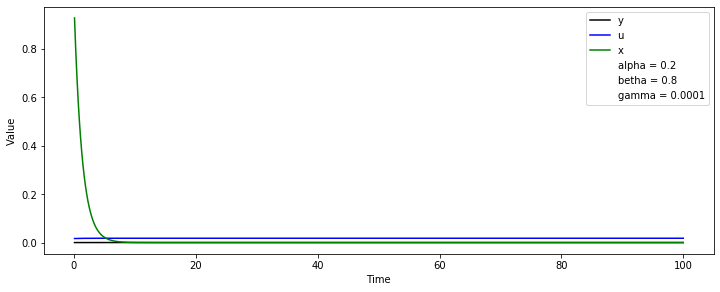

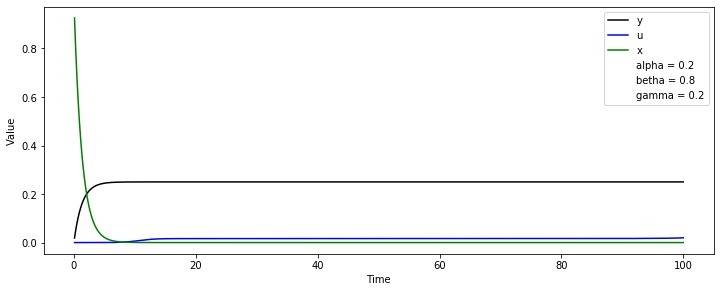

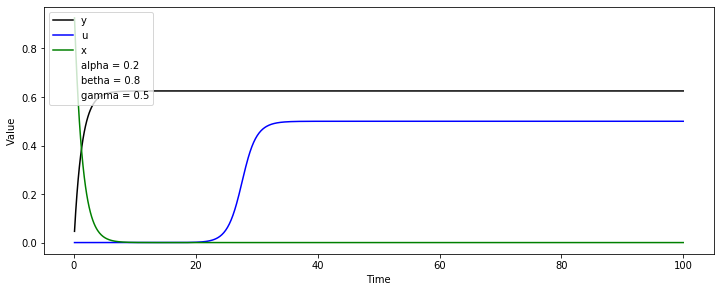

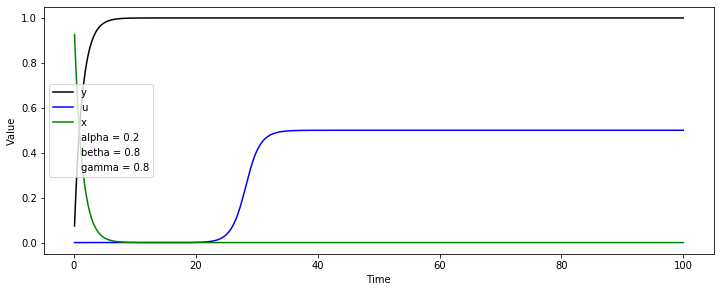

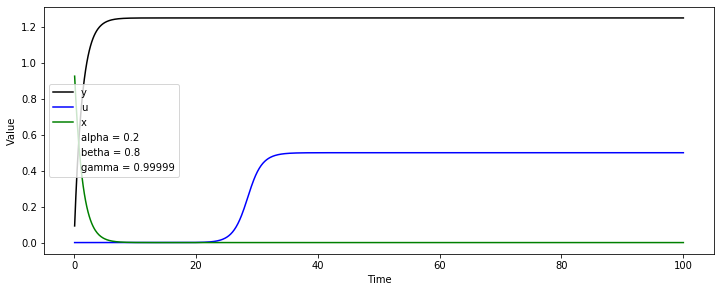

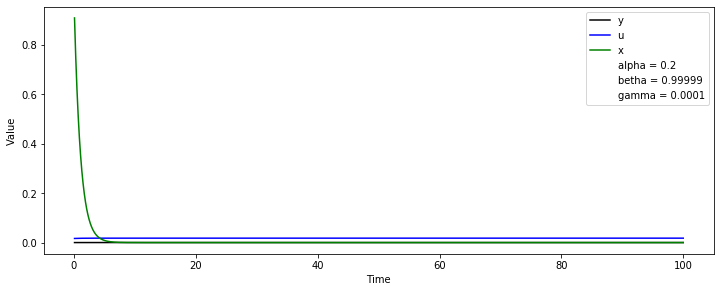

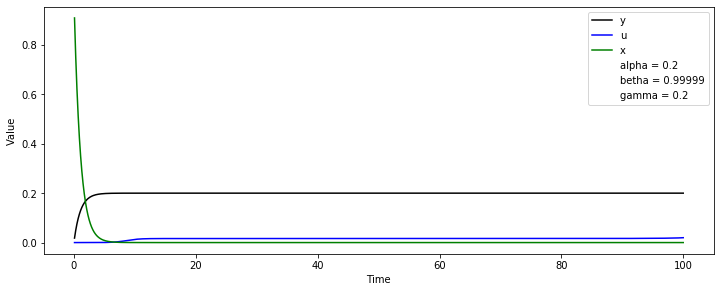

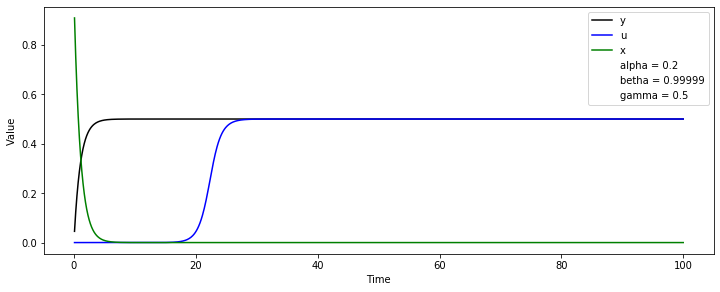

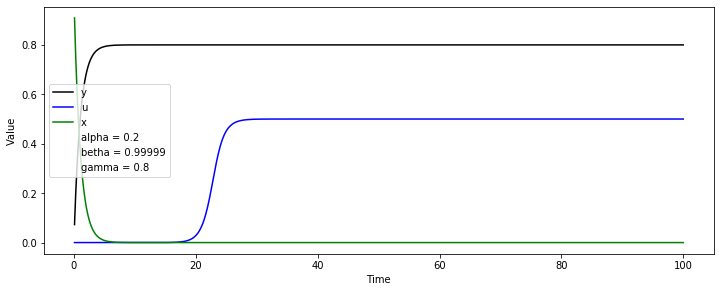

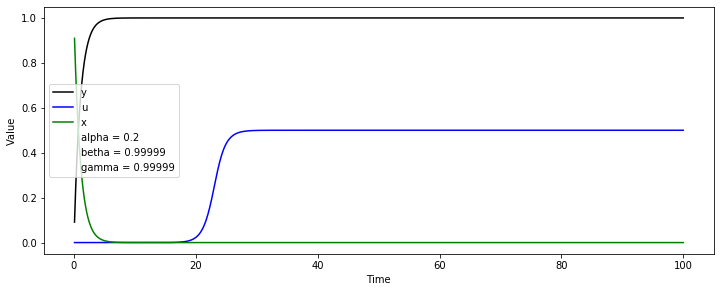

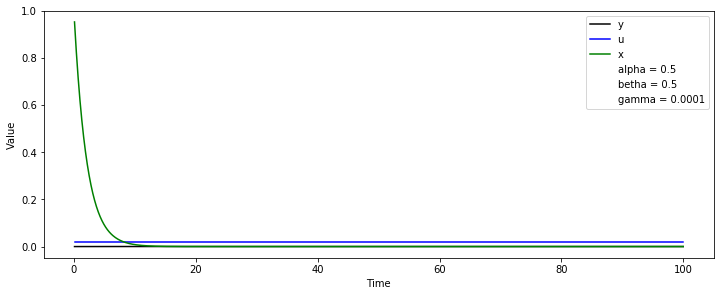

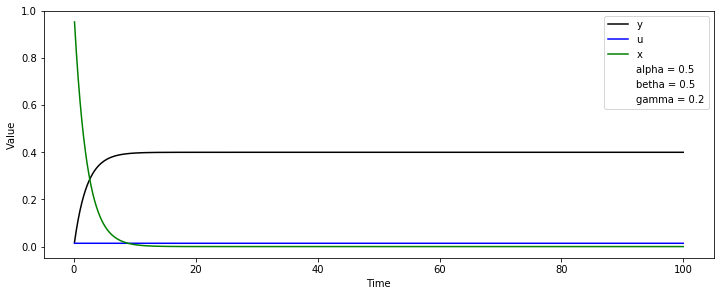

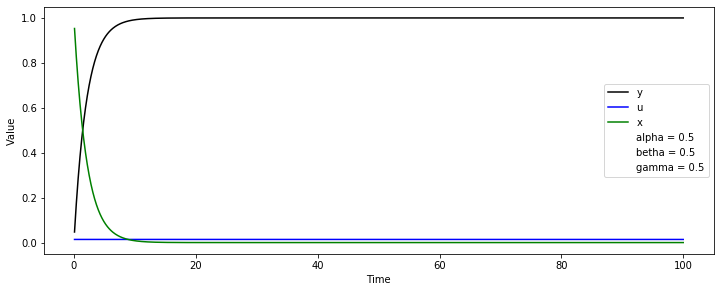

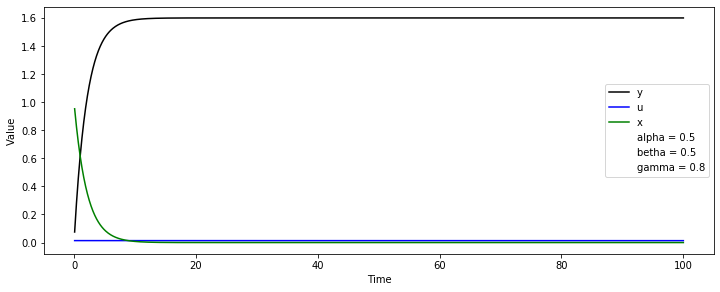

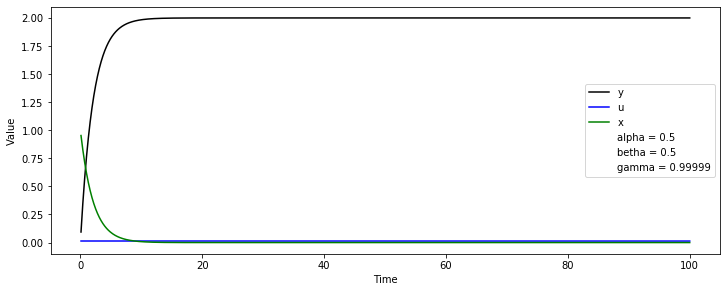

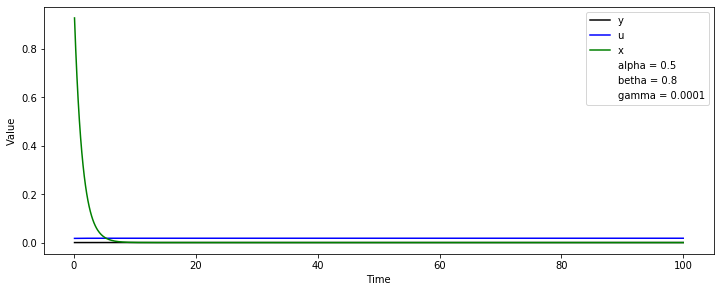

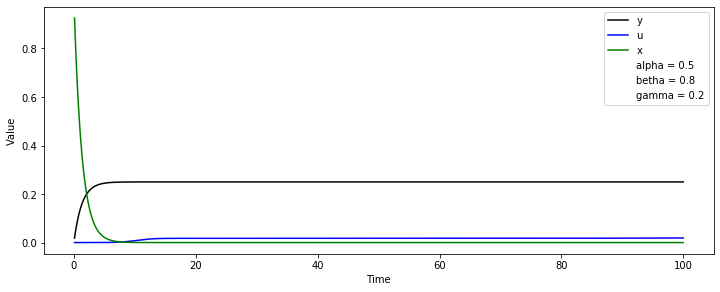

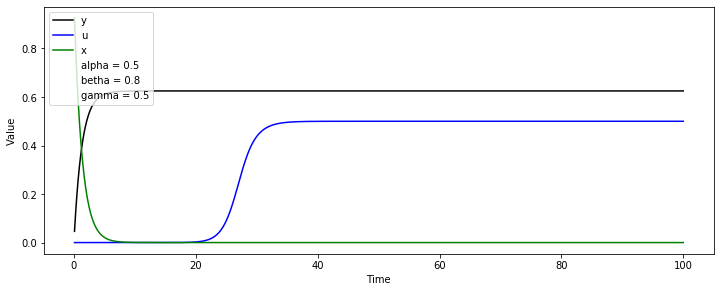

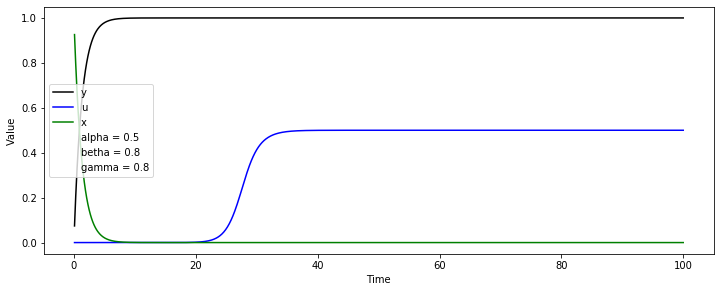

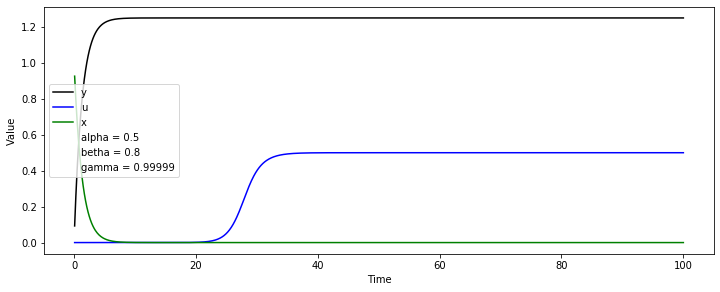

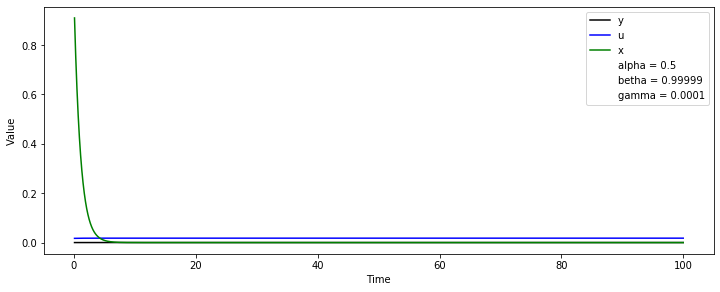

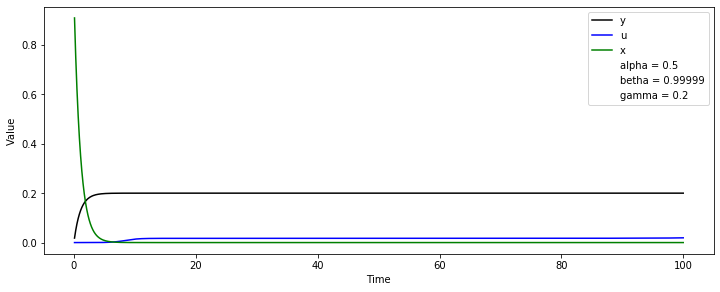

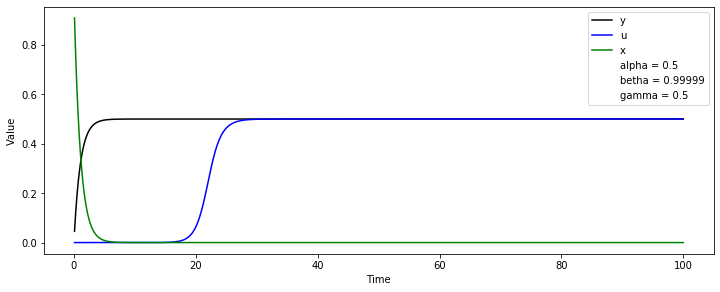

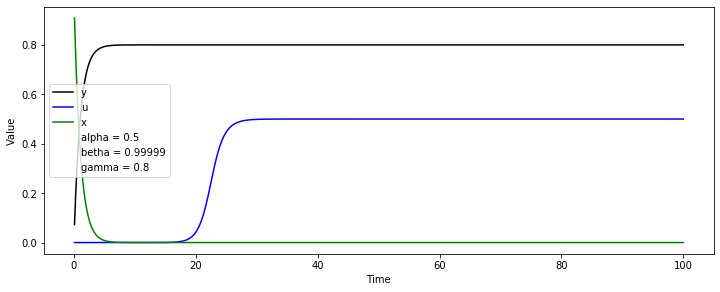

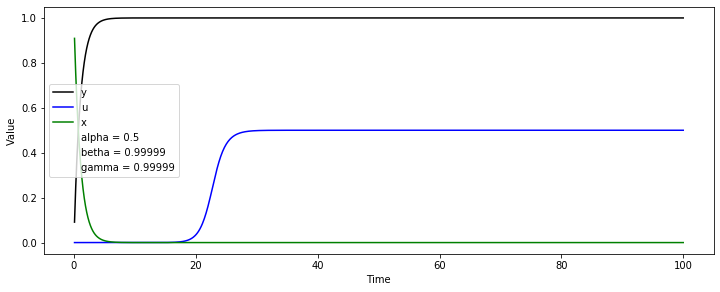

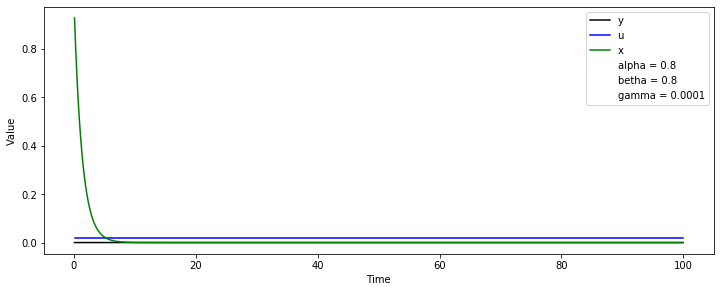

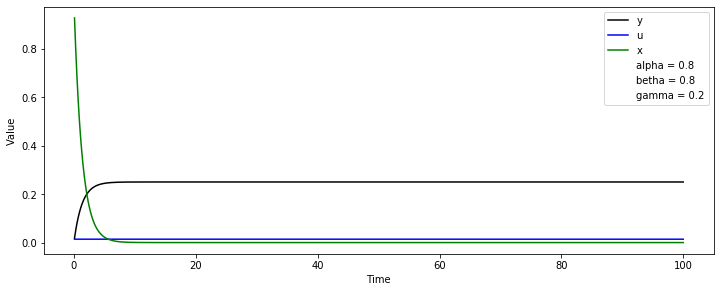

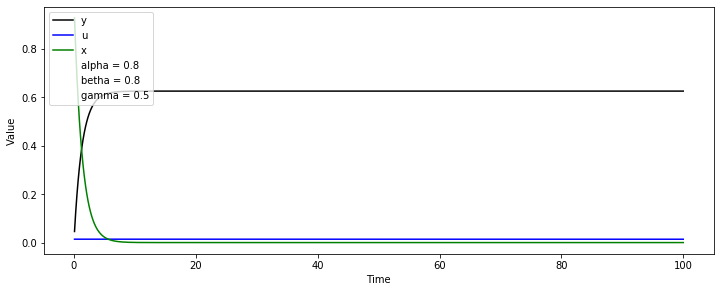

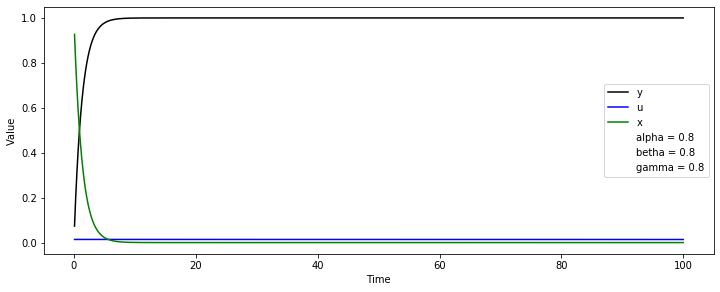

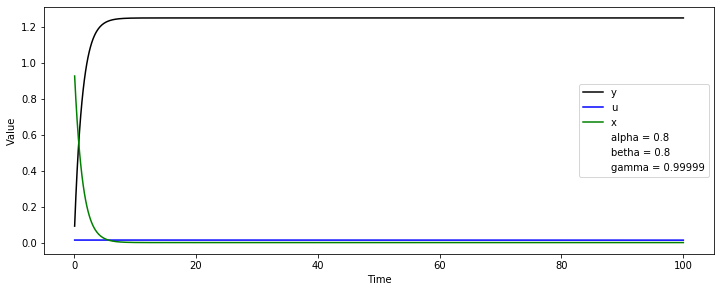

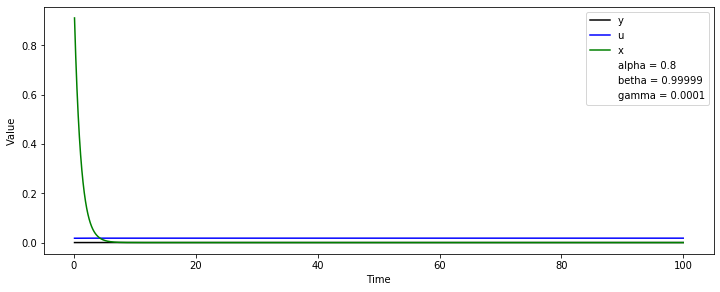

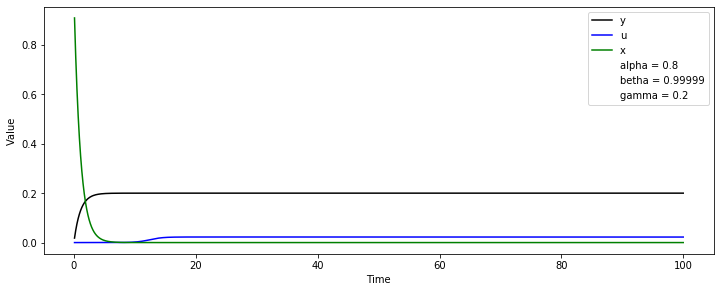

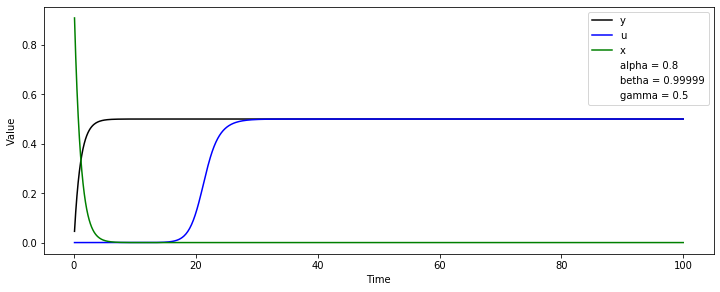

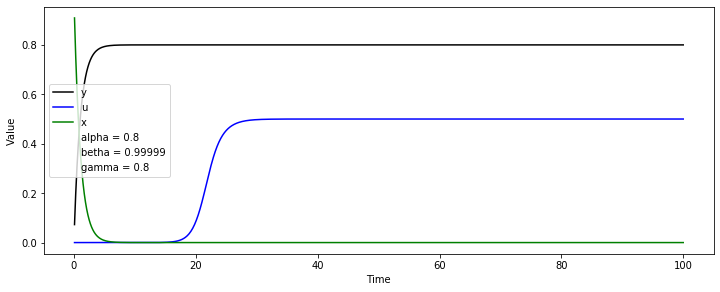

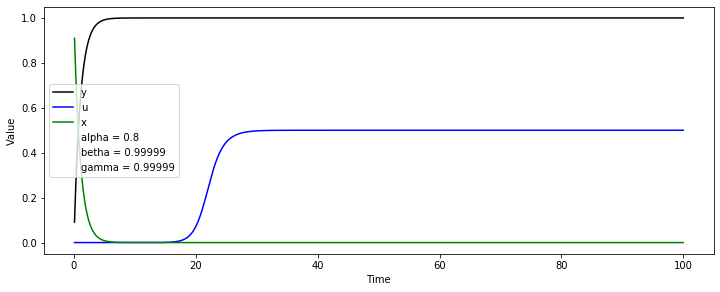

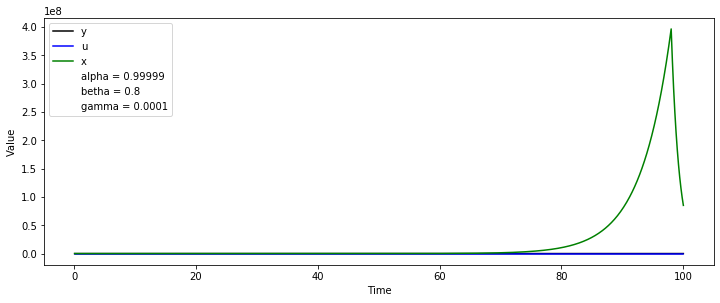

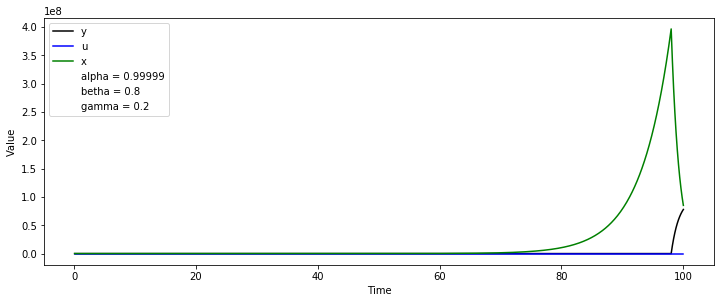

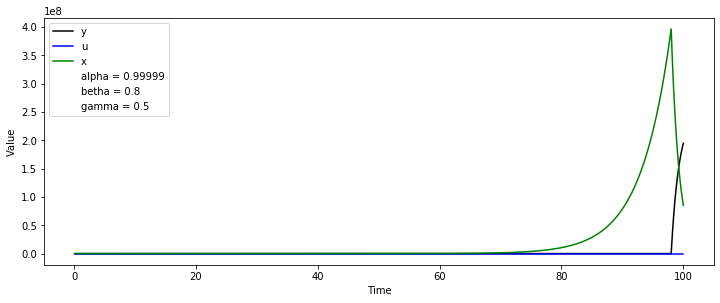

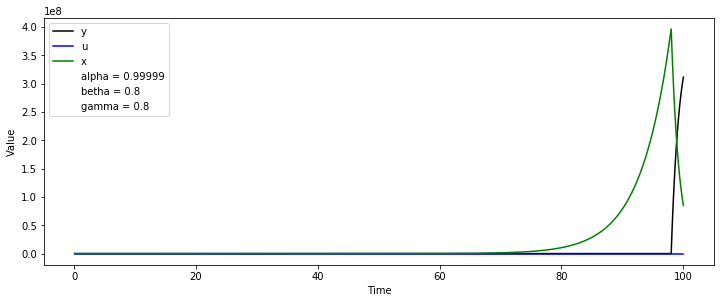

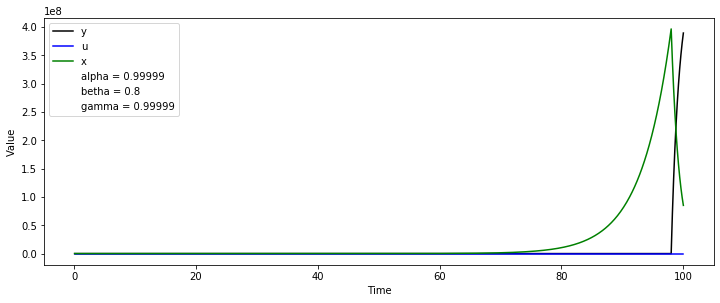

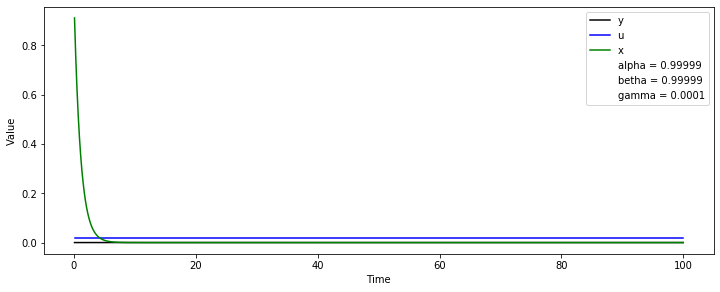

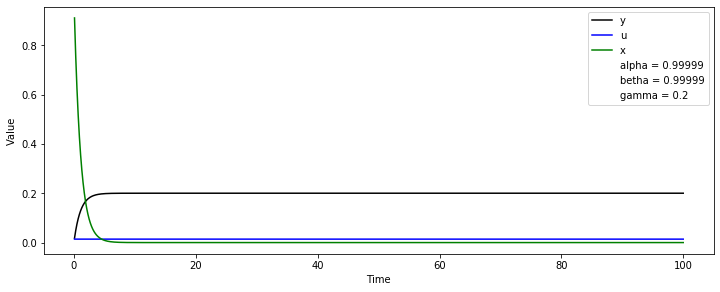

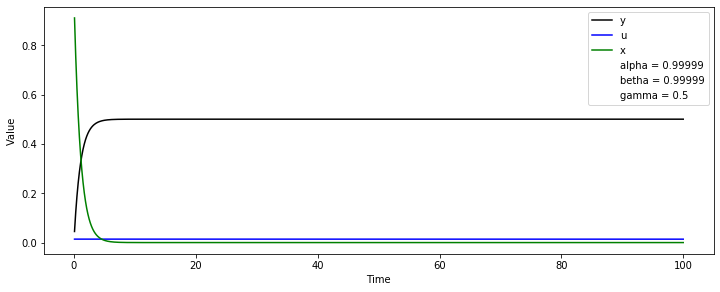

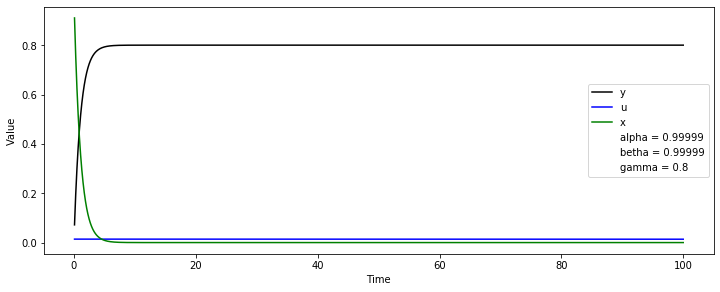

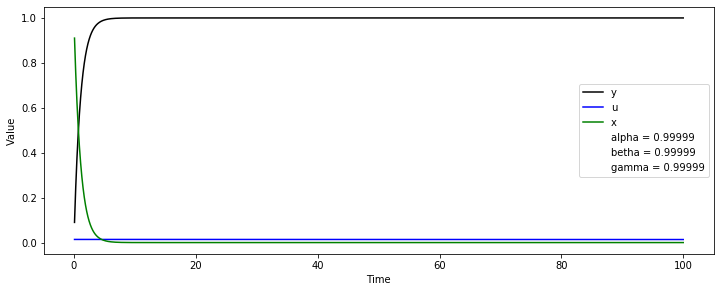

In [28]:
poschitaem1()

А все уже все, а надо было раньше...